## Question 1

In [ ]:
import turicreate

In [2]:
image_data = turicreate.SFrame('./image_train_data/')

In [4]:
sketch = turicreate.Sketch(image_data['label'])

In [5]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [ ]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [6]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [7]:
dog_data =  image_data [image_data ['label'] =='dog']
cat_data =  image_data [image_data ['label'] =='cat']
car_data =  image_data [image_data ['label'] =='automobile']
bird_data =  image_data [image_data ['label'] =='bird']

In [11]:
print(len(dog_data))
print(len(cat_data))
print(len(car_data))
print(len(bird_data))

509
509
509
478


In [12]:
cat_model = turicreate.nearest_neighbors.create(cat_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [13]:
car_model = turicreate.nearest_neighbors.create(car_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [14]:
dog_model = turicreate.nearest_neighbors.create(dog_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [15]:
bird_model = turicreate.nearest_neighbors.create(bird_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [23]:
test_data = turicreate.SFrame('./image_test_data/')

In [24]:
cat = test_data[0:1]

,SArray
0,

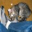

In [25]:
cat['image'].explore()

In [26]:
cat_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.695ms     |

| Done         |         | 100         | 107.902ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


,SArray
0,

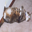

In [29]:
nearest_cat = image_data[image_data['id'] == 16289]
nearest_cat['image'].explore()

In [27]:
dog_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 12.683ms     |

| Done         |         | 100         | 89.237ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

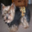

In [30]:
nearest_dog = image_data[image_data['id'] == 16976]
nearest_dog['image'].explore()

## Question 4

In [31]:
image_test_cat= test_data [test_data ['label'] =='cat']
image_test_dog= test_data [test_data ['label'] =='dog'] 
image_test_bird = test_data [test_data ['label'] =='bird']
image_test_automobile = test_data [test_data ['label'] =='automobile']

In [32]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 531.286ms    |

| Done         | 509000  | 100         | 543.548ms    |

+--------------+---------+-------------+--------------+

In [33]:
dog_bird_neighbors  = bird_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 480.709ms    |

| Done         | 478000  | 100         | 505.965ms    |

+--------------+---------+-------------+--------------+

In [35]:
dog_car_neighbors  = car_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 3.26s        |

| Done         | 509000  | 100         | 3.45s        |

+--------------+---------+-------------+--------------+

In [36]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 509000  | 100         | 9.26s        |

| Done         | 509000  | 100         | 9.88s        |

+--------------+---------+-------------+--------------+

In [37]:
dog_distances = turicreate.SFrame({'dog-dog' : dog_dog_neighbors['distance'],
                                   'dog-car' : dog_car_neighbors['distance'],
                                   'dog-cat' : dog_cat_neighbors['distance'],
                                   'dog-bird': dog_bird_neighbors['distance']
                                  })

In [38]:
dog_distances

dog-bird,dog-car,dog-cat,dog-dog
41.75386473035126,41.95797614571203,36.419607706754384,33.47735903726335
41.3382958924861,46.00213318067788,38.83532688735542,32.84584956840554
38.615759085289056,42.946229069238804,36.97634108541546,35.03970731890584
37.08922699538214,41.68660600484793,34.575007291446106,33.90103276968193
38.27228869398105,39.22696649347584,34.77882479101661,37.484925090925636
39.146208923590486,40.58451176980721,35.11715782924591,34.94516534398124
40.523040105962316,45.10673529610854,40.60958309132649,39.095727834463545
38.19479183926956,41.32211409739762,39.90368673062214,37.76961310322034
40.156713166131446,41.82446549950164,38.067470016821176,35.10891446032838
45.55979626027668,45.497692940110376,42.72587329506032,43.242283258453455


In [46]:
def is_dog_correct(row):
    if(row['dog-dog'] < row['dog-cat'] and row['dog-dog'] < row['dog-car'] and row['dog-dog'] < row['dog-bird']):
        return 1
    else:
        return 0

In [47]:
is_dog_correct(dog_distances[0])

1

In [48]:
results = dog_distances.apply(is_dog_correct)

In [55]:
print ('accuracy is', 100 * sum(results) / len(results), '%') 

accuracy is 67.8 %
